In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [61]:
df = pd.read_csv("C:\\Users\\User\\Downloads\\USA_Housing.csv")

In [63]:
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [65]:
df.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

In [67]:
df.drop('Address',inplace=True,axis =1)

In [69]:
df

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05
...,...,...,...,...,...,...
4995,60567.944140,7.830362,6.137356,3.46,22837.361035,1.060194e+06
4996,78491.275435,6.999135,6.576763,4.02,25616.115489,1.482618e+06
4997,63390.686886,7.250591,4.805081,2.13,33266.145490,1.030730e+06
4998,68001.331235,5.534388,7.130144,5.44,42625.620156,1.198657e+06


In [71]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [72]:
X = df.drop('Price',axis = 1)
y = df['Price']

In [75]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=37)

In [77]:
scaler = MinMaxScaler().fit(X)

In [79]:
X = scaler.transform(X)

In [81]:
X_train,X_test

(      Avg. Area Income  Avg. Area House Age  Avg. Area Number of Rooms  \
 960       74237.261279             4.663506                   4.705015   
 893       58187.049404             6.084778                   7.256936   
 3493      72079.179941             6.816516                   7.133151   
 534       70243.435121             6.210271                   6.363084   
 3719      60861.192302             5.705720                   5.880685   
 ...                ...                  ...                        ...   
 4533      66148.990825             7.240608                   6.872540   
 988       63128.606521             5.459419                   6.953525   
 844       39411.652788             4.385845                   7.047435   
 4459      77864.514804             5.119941                   6.929686   
 1935      75393.121176             6.778778                   6.135948   
 
       Avg. Area Number of Bedrooms  Area Population  
 960                           4.35     376

In [83]:
from sklearn.linear_model import LinearRegression

In [84]:
model = LinearRegression()

In [87]:
model.fit(X_train,y_train)

LinearRegression()

In [88]:
predicted_y =model.predict(X_test)

In [91]:
predicted_y.shape

(1500,)

In [93]:
from sklearn.metrics import mean_absolute_error,mean_absolute_percentage_error,mean_squared_error

In [95]:
MAE = mean_absolute_error(y_test,predicted_y)
MAPE = mean_absolute_percentage_error(y_test,predicted_y)
MSE = mean_squared_error(y_test,predicted_y)
RMSE = np.sqrt(mean_squared_error(y_test,predicted_y))

In [97]:
print('MAE:',MAE)
print('MAPE:',MAPE)
print('MSE:',MSE)
print('RMSE:',RMSE)

MAE: 80899.5385172994
MAPE: 0.07369688505176537
MSE: 10140450124.87527
RMSE: 100699.80201010959


In [99]:
y

0       1.059034e+06
1       1.505891e+06
2       1.058988e+06
3       1.260617e+06
4       6.309435e+05
            ...     
4995    1.060194e+06
4996    1.482618e+06
4997    1.030730e+06
4998    1.198657e+06
4999    1.298950e+06
Name: Price, Length: 5000, dtype: float64

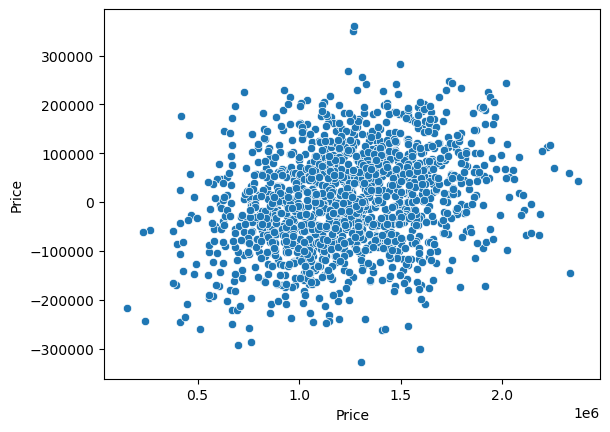

In [101]:

sns.scatterplot(x=y_test,y=y_test-predicted_y)
plt.show()

In [102]:
model.predict([[79545.458574,5.682861,7.009188,4.09,23086.800503]])

C:\Users\User\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([1222755.97976159])

In [103]:
from sklearn.preprocessing import PolynomialFeatures

In [107]:
poly_converter = PolynomialFeatures(include_bias=False)

In [109]:
poly_features = poly_converter.fit_transform(X)

In [111]:
poly_features.shape

(5000, 20)

In [113]:
train_errors=[]
test_errors =[]
for degrees in range(1,10):
    poly_converter = PolynomialFeatures(degree = degrees,include_bias=False)
    poly_features = poly_converter.fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=101)
    model = LinearRegression().fit(X_train,y_train)
    predictions_test = model.predict(X_test)
    predictions_train = model.predict(X_train)

    RMSE_train = mean_squared_error(y_train,predictions_train)**0.5
    train_errors.append(RMSE_train)

    RMSE_test = mean_squared_error(y_test,predictions_test)**0.5
    test_errors.append(RMSE_test)

train_errors,test_errors
    
    
    
    
    

([101211.97819208549,
  100952.93494474105,
  100489.20724842744,
  99376.51615027658,
  97653.8303135886,
  94231.09400548572,
  89182.6108634597,
  80531.3450355447,
  67279.11551501295],
 [100842.08231635064,
  101482.28927350145,
  102071.77080115092,
  104404.70149636334,
  108591.04995254069,
  137680.52762375094,
  309239.9829041008,
  1438951.92844167,
  14913004.869792093])

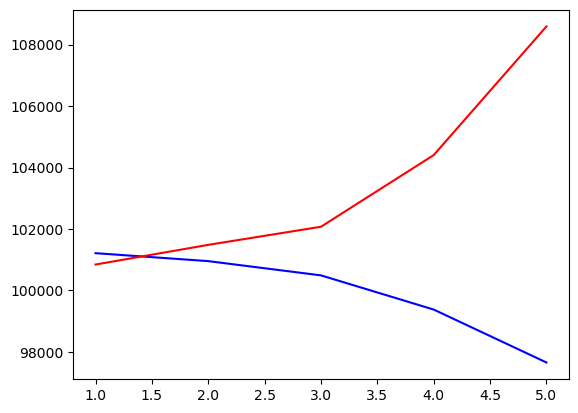

In [114]:
plt.plot(range(1,6),train_errors[:5],color='blue')
plt.plot(range(1,6),test_errors[:5],color='red')
plt.show()

In [115]:
poly_converter = PolynomialFeatures(degree = 1,include_bias=False)
poly_features = poly_converter.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=37)
model = LinearRegression().fit(X_train,y_train)
predictions_test = model.predict(X_test)


RMSE = mean_squared_error(y_test,predictions_test)**0.5
RMSE

100699.80201011409

In [116]:
model.predict([[0.53071451, 0.48699729, 0.47267788, 0.46      , 0.66708815]])

array([1300855.17239215])

In [117]:
r2_score = model.score(X_test, y_test)
print(f"R² score: {r2_score * 100:.2f}%")


R² score: 91.69%


In [118]:
X

array([[0.68682217, 0.44198584, 0.50150158, 0.46444444, 0.3299422 ],
       [0.68352073, 0.48853836, 0.46450137, 0.24222222, 0.57596801],
       [0.48373705, 0.46860901, 0.70135011, 0.69555556, 0.52858204],
       ...,
       [0.50713527, 0.67002636, 0.20853446, 0.02888889, 0.47651494],
       [0.55841872, 0.4203891 , 0.51757886, 0.76444444, 0.61128233],
       [0.53071451, 0.48699729, 0.47267788, 0.46      , 0.66708815]])

In [119]:
y

0       1.059034e+06
1       1.505891e+06
2       1.058988e+06
3       1.260617e+06
4       6.309435e+05
            ...     
4995    1.060194e+06
4996    1.482618e+06
4997    1.030730e+06
4998    1.198657e+06
4999    1.298950e+06
Name: Price, Length: 5000, dtype: float64

# CaseStudy

In [121]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns

In [122]:
df = pd.read_csv("C:\\Users\\User\\Downloads\\covid_19_data.csv")

In [123]:
df.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


In [20]:
df['ObservationDate'].value_counts()

ObservationDate
03/18/2020    284
03/17/2020    276
03/16/2020    272
03/09/2020    266
03/15/2020    258
03/08/2020    255
03/14/2020    249
03/13/2020    230
03/07/2020    225
03/12/2020    218
03/11/2020    216
03/10/2020    206
03/06/2020    199
03/05/2020    173
03/04/2020    160
03/03/2020    151
03/02/2020    141
03/01/2020    125
02/29/2020    119
02/28/2020    114
02/27/2020    105
02/26/2020    101
02/25/2020     94
02/24/2020     90
02/23/2020     85
02/22/2020     84
02/21/2020     84
02/20/2020     76
02/19/2020     76
02/17/2020     75
02/16/2020     75
02/15/2020     75
02/14/2020     75
02/18/2020     75
02/13/2020     74
02/12/2020     73
02/11/2020     73
02/07/2020     72
02/10/2020     72
02/09/2020     72
02/08/2020     72
02/06/2020     71
02/05/2020     71
02/04/2020     70
02/03/2020     68
02/02/2020     67
02/01/2020     67
01/31/2020     62
01/30/2020     58
01/29/2020     54
01/28/2020     52
01/27/2020     51
01/26/2020     47
01/23/2020     46
01/25/2020  

In [57]:
df

,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0
...,...,...,...,...,...,...,...
6717,03/18/2020,NaN,Guernsey,2020-03-17T18:33:03,0.0,0.0,0.0
6718,03/18/2020,NaN,Jersey,2020-03-17T18:33:03,0.0,0.0,0.0
6719,03/18/2020,NaN,Puerto Rico,2020-03-17T16:13:14,0.0,0.0,0.0
6720,03/18/2020,NaN,Republic of the Congo,2020-03-17T21:33:03,0.0,0.0,0.0


In [54]:
df.drop('SNo',axis=1,inplace = True)

KeyError: "['SNo'] not found in axis"

In [258]:
dff['Day'] = range(1,len(dff)+1)

In [ ]:
dff= df.groupby('ObservationDate').sum(numeric_only=True)


In [262]:
dff

,Confirmed,Deaths,Recovered,Infected,Day
ObservationDate,,,,,
01/22/2020,555.0,17.0,28.0,510.0,1
01/23/2020,653.0,18.0,30.0,605.0,2
01/24/2020,941.0,26.0,36.0,879.0,3
01/25/2020,1438.0,42.0,39.0,1357.0,4
01/26/2020,2118.0,56.0,52.0,2010.0,5
01/27/2020,2927.0,82.0,61.0,2784.0,6
01/28/2020,5578.0,131.0,107.0,5340.0,7
01/29/2020,6165.0,133.0,126.0,5906.0,8
01/30/2020,8235.0,171.0,143.0,7921.0,9


In [146]:
columns = list(dff)[:3]

In [154]:
X_list = []
y_list = []
for i in columns:
    a=dff.drop(i,axis=1)
    X_list+=[a]
    y_list+=[dff[i]]


In [214]:
X_test =[]
X_train=[]
y_test =[]
y_train=[]

In [216]:
for i in range(len(X_list)):
    X_test +=[X_list[i][len(X_list[i])-7:]]
    X_train+=[X_list[i][:len(X_list[i])-7]]
    y_test +=[y_list[i][len(y_list[i])-7:]]
    y_train+=[y_list[i][:len(y_list[i])-7]]


In [226]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_absolute_percentage_error,mean_squared_error

In [228]:
models = []
predictions = []
MAE_list = []
MAPE_list = []
RMSE_list = []
for i in range (len(X_test)):
    model = LinearRegression().fit(X_train[i],y_train[i])
    models.append(model)
    prediction_y = model.predict(X_test[i])
    predictions.append(prediction_y)
    MAE=mean_absolute_error(y_test[i],prediction_y)
    MAPE=mean_absolute_percentage_error(y_test[i],prediction_y)
    RMSE=np.sqrt(mean_squared_error(y_test[i],prediction_y))
    MAE_list.append(MAE)
    MAPE_list.append(MAPE)
    RMSE_list.append(RMSE)
    
    
    

In [256]:
models[0].predict([[8733.0,83313.0,122869.0]])

C:\Users\User\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([214915.])

In [254]:
dff

,Confirmed,Deaths,Recovered,Infected
ObservationDate,,,,
01/22/2020,555.0,17.0,28.0,510.0
01/23/2020,653.0,18.0,30.0,605.0
01/24/2020,941.0,26.0,36.0,879.0
01/25/2020,1438.0,42.0,39.0,1357.0
01/26/2020,2118.0,56.0,52.0,2010.0
01/27/2020,2927.0,82.0,61.0,2784.0
01/28/2020,5578.0,131.0,107.0,5340.0
01/29/2020,6165.0,133.0,126.0,5906.0
01/30/2020,8235.0,171.0,143.0,7921.0


In [264]:
dff

,Confirmed,Deaths,Recovered,Infected,Day
ObservationDate,,,,,
01/22/2020,555.0,17.0,28.0,510.0,1
01/23/2020,653.0,18.0,30.0,605.0,2
01/24/2020,941.0,26.0,36.0,879.0,3
01/25/2020,1438.0,42.0,39.0,1357.0,4
01/26/2020,2118.0,56.0,52.0,2010.0,5
01/27/2020,2927.0,82.0,61.0,2784.0,6
01/28/2020,5578.0,131.0,107.0,5340.0,7
01/29/2020,6165.0,133.0,126.0,5906.0,8
01/30/2020,8235.0,171.0,143.0,7921.0,9


In [280]:
X = dff[['Day']]
y1=dff[['Confirmed']]
y2=dff[['Deaths']]
y3=dff[['Recovered']]
y4=dff[['Infected']]

In [282]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y1, test_size=0.20, shuffle = False)
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y2, test_size=0.20, shuffle = False)
X_train3, X_test3, y_train3, y_test3 = train_test_split(X, y3, test_size=0.20, shuffle = False)
X_train4, X_test4, y_train4, y_test4 = train_test_split(X, y4, test_size=0.20, shuffle = False)

In [284]:
model1 = LinearRegression().fit(X_train1, y_train1)
model2 = LinearRegression().fit(X_train2, y_train2)
model3 = LinearRegression().fit(X_train3, y_train3)
model4 = LinearRegression().fit(X_train4, y_train4)


In [286]:
predictions1 = model1.predict(X_test1)
predictions2 = model2.predict(X_test2)
predictions3 = model3.predict(X_test3)
predictions4 = model4.predict(X_test4)

In [294]:
print('Predictions of Confirmed:')
print('MAE',mean_absolute_error(y_test1,predictions1))
print('MAPE',mean_absolute_percentage_error(y_test1,predictions1))
print('RMSE',np.sqrt(mean_squared_error(y_test1,predictions1)))

Predictions of Confirmed:
MAE 24708.904589371978
MAPE 0.13915022211364217
RMSE 35435.64487302363


In [296]:
print('Predictions of deaths:')
print('MAE',mean_absolute_error(y_test2,predictions2))
print('MAPE',mean_absolute_percentage_error(y_test2,predictions2))
print('RMSE',np.sqrt(mean_squared_error(y_test2,predictions2)))

Predictions of deaths:
MAE 1528.3739569609127
MAPE 0.2318024571766398
RMSE 2026.8892876500595


In [298]:
print('Predictions of Recovered:')
print('MAE',mean_absolute_error(y_test3,predictions3))
print('MAPE',mean_absolute_percentage_error(y_test3,predictions3))
print('RMSE',np.sqrt(mean_squared_error(y_test3,predictions3)))

Predictions of Recovered:
MAE 19882.14330259112
MAPE 0.28116947437681067
RMSE 20192.923254621015


In [302]:
print('Predictions of Infected:')
print('MAE',mean_absolute_error(y_test4,predictions4))
print('MAPE',mean_absolute_percentage_error(y_test4,predictions4))
print('RMSE',np.sqrt(mean_squared_error(y_test4,predictions4)))

Predictions of Infected:
MAE 18335.07045088567
MAPE 0.2640492928992447
RMSE 21745.14019683955


In [352]:
sns.scatterplot(x=X_test1.iloc[:,0],y=y_test1.iloc[:,0])
plt.plot(X_test1,predictions1)

In [330]:
X_test


ObservationDate
03/07/2020    46
03/08/2020    47
03/09/2020    48
03/10/2020    49
03/11/2020    50
03/12/2020    51
03/13/2020    52
03/14/2020    53
03/15/2020    54
03/16/2020    55
03/17/2020    56
03/18/2020    57
Name: Day, dtype: int64

In [322]:
a

array([1], dtype=int64)